# 처음으로 돌아가자

모든걸 다했지만 계속 점수가 똥망이라 처음부터 다시 해보기로 함

파생변수 생성보다 카테고리컬에 집중할 예정

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier #분류트리(모델) 
from sklearn.model_selection import train_test_split # train/test
from sklearn.metrics import accuracy_score, confusion_matrix # 평가 : 분류정확도 
from sklearn.metrics import classification_report # 평가 : 정확률, 재현율, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv(r'C:\Users\user\Desktop\code\[유비온]신용카드 사용자 연제 예측\235713_신용카드 사용자 연체 예측 AI 경진대회_data (1)\open\train.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\code\[유비온]신용카드 사용자 연제 예측\235713_신용카드 사용자 연체 예측 AI 경진대회_data (1)\open\test.csv')
submission = pd.read_csv(r'C:\Users\user\Desktop\code\[유비온]신용카드 사용자 연제 예측\235713_신용카드 사용자 연체 예측 AI 경진대회_data (1)\open\sample_submission.csv')

In [4]:
train.drop(columns=['index'], inplace=True)
test.drop(columns=['index'],inplace=True)

In [5]:
# 결측치 NaN으로 채워줌
train.fillna('Nan', inplace=True) 
test.fillna('Nan', inplace=True)

# Preprocessing

In [6]:
#child_num 자식 있으면 y 없으면 n
train.loc[train['child_num'] ==0, 'child_num'] = 'N'
train.loc[train['child_num'] != 'N', 'child_num'] = 'Y'
test.loc[test['child_num'] == 0, 'child_num'] = 'N'
test.loc[test['child_num'] != 'N', 'child_num'] = 'Y'

In [58]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,N,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,Y,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,N,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,N,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,N,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,Y,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,Y,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,N,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,N,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [12]:
# #train['family_type'] couple / single로 구분
# train['family_type'] = train['family_type'].replace(['Married', 'Civil marriage'] , 'couple')
# train['family_type'] = train['family_type'].replace(['Single / not married', 'Separated', 'Widow'], 'single')
# test['family_type'] = test['family_type'].replace(['Married', 'Civil marriage'] , 'couple')
# test['family_type'] = test['family_type'].replace(['Single / not married', 'Separated', 'Widow'], 'single')

In [7]:
# #family_size single, couple, fam, bigfam으로 구분
# print(train['family_size'].value_counts())
# train['family_size'] = train['family_size'].replace(1, 'single')
# train['family_size'] = train['family_size'].replace(2, 'couple')
# train['family_size'] = train['family_size'].replace([3,4], 'family')
# train['family_size'] = train['family_size'].replace([5,6], 'big family')

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64


In [20]:
# train.loc[train['family_size'] > 6, 'family_size'] = train['family_size'].mean()
# train['family_size'].value_counts()
# train.drop(columns='index',inplace=True)
# test.drop(columns='index',inplace=True)

In [7]:
def ID_col(df_1, df_2):
    """[데이터 셋 전처리 함수입니다.]

    Args:
        df_1 ([Dataset]): [train 데이터셋을 입력해주세요]
        df_2 ([Dataset]): [test 데이터셋을 입력해주세요]
    """
    
    # 변수 설정
     
    df_list = []
    df_list.append(df_1)
    df_list.append(df_2)
    a = []
    change_credit = 0
    names = ['train', 'test']

    # ID 생성
    
    for name, dataset, in zip(names, df_list):
    # for dataset in df_list:
        dataset['ID'] = dataset['gender'].astype(str) +'.'+ dataset['car'].astype(str)+'.' + dataset['reality'].astype(str)+'.' + \
                dataset['child_num'].astype(str)+'.' + dataset['income_total'].astype(str) +'.'+ dataset['income_type'].astype(str) +'.'+ \
                dataset['edu_type'].astype(str)+'.' + dataset['family_type'].astype(str)+'.' + dataset['house_type'].astype(str) +'.'+ \
                dataset['DAYS_BIRTH'].astype(str) +'.'+ dataset['DAYS_EMPLOYED'].astype(str) +'.'+ dataset['work_phone'].astype(str) +'.'+ \
                dataset['phone'].astype(str) +'.'+ dataset['email'].astype(str) +'.' + dataset['family_size'].astype(str)+'.' + dataset['occyp_type'].astype(str)
        
        dataset = dataset.sort_values(['ID','begin_month'], ascending=[True, False])
        dataset.reset_index(inplace=True)
        dataset.drop(columns={'index'}, inplace=True)

        # OrdinalEncoder로 ID 변환
        
        print('\033[96m' + '해당 Data 내의 고유 ID 수는 {}입니다. '.format(dataset['ID'].nunique()) + 
              '\033[0m' + 'OrdinalEncoder를 이용힌 변환을 시작합니다.')
        encode = OrdinalEncoder()
        dataset[['ID']] = encode.fit_transform(dataset[['ID']])

In [8]:
ID_col(train, test)

해당 Data 내의 고유 ID 수는 8759입니다. OrdinalEncoder를 이용힌 변환을 시작합니다.
해당 Data 내의 고유 ID 수는 5585입니다. OrdinalEncoder를 이용힌 변환을 시작합니다.


In [9]:
encode = OrdinalEncoder()
train[['ID']] = encode.fit_transform(train[['ID']])
encode = OrdinalEncoder()
test[['ID']] = encode.fit_transform(test[['ID']])

In [101]:
test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,ID
0,M,Y,N,N,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,Nan,2.0,-60.0,1
1,F,N,Y,N,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0,2
2,F,N,Y,N,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0,3
3,M,Y,N,N,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0,4
4,F,Y,Y,N,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,Y,Y,N,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,Accountants,2.0,-19.0,2992
9996,M,Y,Y,N,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,Laborers,2.0,-34.0,761
9997,F,N,Y,N,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,Medicine staff,2.0,-55.0,2834
9998,F,Y,N,N,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,Nan,2.0,-33.0,70


In [10]:
def replace_value_family(df_1, df_2, num_of_outlier):
    """[Family_size의 outlier를 대치해주는 작업을 시행합니다.]

    Args:
        df_1 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
        df_2 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
        num_of_outlier ([outlier_standard]): [family_size의 outlier 기준을 입력하세요]
    """
    # 변수 설정
    
    df_list = []
    df_list.append(df_1)
    df_list.append(df_2)
    names = ['train', 'test']

    # family_size Outlier를 처리하는 작업
    
    for dataset,name in zip(df_list,names):
        
        print('\033[96m' + 'family_size {}명 이상인 사람의 수 : {}'.format(num_of_outlier, 
                                                                      len(dataset.loc[dataset['family_size'] >= num_of_outlier])) +
              '\033[0m')
        
        sub = dataset.loc[dataset['family_size']>= num_of_outlier]
        
        for i in tqdm(range(len(sub))):
        
            a = int(dataset[dataset['family_type'] == sub['family_type'].values[i]].mean()['family_size'])
            
            dataset.loc[(dataset['family_size']>= num_of_outlier), 'family_size'] = a
        
        # 잘 처리되었는지 확인하는 부분
        
        print('\033[96m' + 'family_size {}명 이상인 사람의 수 : {}'.format(num_of_outlier, 
                                                        len(dataset.loc[dataset['family_size'] >= num_of_outlier]))+
              '\033[0m')

In [11]:
replace_value_family(train, test, 7)

family_size 7명 이상인 사람의 수 : 15


100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


family_size 7명 이상인 사람의 수 : 0
family_size 7명 이상인 사람의 수 : 10


100%|██████████| 10/10 [00:00<00:00, 20.77it/s]

family_size 7명 이상인 사람의 수 : 0


In [12]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

In [13]:
feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    train[feat]=np.abs(train[feat])
    test[feat]=np.abs(test[feat])

In [14]:
for df in [train,test]:
    #ability: 소득/(살아온 일수+ 근무일수)
    df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])

In [72]:
test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,ID,ability
0,M,Y,N,N,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,21990,0,1,0,1,0,Nan,2.0,60.0,1,5.115962
1,F,N,Y,N,135000.0,State servant,Higher education,Married,House / apartment,18964,8671,1,0,1,0,Core staff,2.0,36.0,2,4.885109
2,F,N,Y,N,69372.0,Working,Secondary / secondary special,Married,House / apartment,15887,217,1,1,1,0,Laborers,2.0,40.0,3,4.307750
3,M,Y,N,N,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,19270,2531,1,1,0,0,Drivers,2.0,41.0,4,5.160314
4,F,Y,Y,N,225000.0,State servant,Higher education,Married,House / apartment,17822,9385,1,1,0,0,Managers,2.0,8.0,5,8.269931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,Y,Y,N,202500.0,Working,Incomplete higher,Married,House / apartment,18593,5434,1,1,1,0,Accountants,2.0,19.0,2992,8.428018
9996,M,Y,Y,N,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,10886,1315,1,1,0,0,Laborers,2.0,34.0,761,16.597000
9997,F,N,Y,N,292500.0,Working,Secondary / secondary special,Married,House / apartment,21016,14018,1,0,0,0,Medicine staff,2.0,55.0,2834,8.349032
9998,F,Y,N,N,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,16541,1085,1,0,1,0,Nan,2.0,33.0,70,10.212187


In [74]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit', 'ID', 'ability'],
      dtype='object')

In [142]:
ordinary_feats = ['begin_month', 'family_size', 'income_total','DAYS_BIRTH', 'DAYS_EMPLOYED','ability']
#OrdinalEncoder
from category_encoders.ordinal import OrdinalEncoder
encoder = OrdinalEncoder(ordinary_feats)
train[ordinary_feats] = encoder.fit_transform(train[ordinary_feats], train['credit'])
test[ordinary_feats] = encoder.fit_transform(test[ordinary_feats])

In [143]:
train = pd.get_dummies(train,columns=['gender', 'car', 'reality', 'income_type', 'edu_type','family_type', 'house_type', 'occyp_type','child_num', 'FLAG_MOBIL', 'work_phone', 'phone', 'email'],drop_first=True)
test = pd.get_dummies(test,columns=['gender', 'car', 'reality', 'income_type', 'edu_type','family_type', 'house_type', 'occyp_type','child_num', 'FLAG_MOBIL', 'work_phone', 'phone', 'email'],drop_first=True)

In [76]:
train

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,credit,ID,ability,...,occyp_type_Nan,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,work_phone_1,phone_1,email_1
0,0,1,202500.0,13899,4709,2.0,6.0,1.0,1,10.882416,...,1,0,0,0,0,0,0,0,0,0
1,1,2,247500.0,11380,1540,3.0,5.0,1.0,2,19.156347,...,0,0,0,0,0,0,0,0,0,1
2,2,1,450000.0,19087,4434,2.0,22.0,2.0,3,19.131840,...,0,0,0,0,0,0,0,0,1,0
3,3,1,202500.0,15088,2092,2.0,37.0,0.0,4,11.786962,...,0,0,0,1,0,0,0,0,1,0
4,4,1,157500.0,15037,2105,2.0,26.0,2.0,5,9.187959,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,2,225000.0,12079,1984,4.0,2.0,1.0,3301,15.999431,...,0,0,0,0,0,0,0,0,0,0
26453,26453,2,180000.0,15291,2475,2.0,47.0,2.0,8756,10.131712,...,1,0,0,0,0,0,0,0,0,0
26454,26454,1,292500.0,10082,2015,2.0,25.0,2.0,8757,24.179549,...,0,0,0,0,0,0,0,0,0,0
26455,26455,1,171000.0,10145,107,1.0,59.0,2.0,8758,16.679672,...,0,0,0,0,0,0,0,0,0,0


In [144]:
train.to_csv('1107_newborn_train.csv')
test.to_csv('1107_newborn_test.csv')

In [118]:
# train['income_total'] = train['income_total'].astype(int)
# test['income_total'] = test['income_total'].astype(int)

In [124]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   income_total                            10000 non-null  int32  
 1   DAYS_BIRTH                              10000 non-null  int64  
 2   DAYS_EMPLOYED                           10000 non-null  int64  
 3   family_size                             10000 non-null  float64
 4   begin_month                             10000 non-null  float64
 5   ID                                      10000 non-null  int32  
 6   ability                                 10000 non-null  float64
 7   gender_M                                10000 non-null  uint8  
 8   car_Y                                   10000 non-null  uint8  
 9   reality_Y                               10000 non-null  uint8  
 10  income_type_Pensioner                   10000 non-null  uin

In [126]:
train_x

,index,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month,ID,ability,gender_M,car_Y,...,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,child_num_Y,work_phone_1,phone_1,email_1
0,0,202500,13899,4709,2.0,6.0,1,10.882416,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,247500,11380,1540,3.0,5.0,2,19.156347,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,450000,19087,4434,2.0,22.0,3,19.131840,1,1,...,0,0,0,0,0,0,0,0,1,0
3,3,202500,15088,2092,2.0,37.0,4,11.786962,0,0,...,0,0,1,0,0,0,0,0,1,0
4,4,157500,15037,2105,2.0,26.0,5,9.187959,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,225000,12079,1984,4.0,2.0,3301,15.999431,0,0,...,0,0,0,0,0,0,1,0,0,0
26453,26453,180000,15291,2475,2.0,47.0,8756,10.131712,0,0,...,0,0,0,0,0,0,1,0,0,0
26454,26454,292500,10082,2015,2.0,25.0,8757,24.179549,0,1,...,0,0,0,0,0,0,0,0,0,0
26455,26455,171000,10145,107,1.0,59.0,8758,16.679672,1,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [146]:
#재헌쓰모델
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

'''print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)'''

# 모델 학습
cat_clf=CatBoostClassifier()
cat_clf.fit(X_train, y_train)
y_pred=cat_clf.predict_proba(X_val)

# 평가
print("훈련 세트 정확도: {:.3f}".format(cat_clf.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(cat_clf.score(X_val, y_val)))

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Learning rate set to 0.092151
0:	learn: 1.0465662	total: 22.2ms	remaining: 22.2s
1:	learn: 1.0058882	total: 28.1ms	remaining: 14s
2:	learn: 0.9732173	total: 34ms	remaining: 11.3s
3:	learn: 0.9456595	total: 39.5ms	remaining: 9.84s
4:	learn: 0.9229736	total: 45.2ms	remaining: 9s
5:	learn: 0.9043282	total: 50.5ms	remaining: 8.36s
6:	learn: 0.8887651	total: 56.9ms	remaining: 8.07s
7:	learn: 0.8760139	total: 62.6ms	remaining: 7.76s
8:	learn: 0.8647873	total: 68ms	remaining: 7.49s
9:	learn: 0.8558647	total: 74ms	remaining: 7.33s
10:	learn: 0.8488699	total: 78.3ms	remaining: 7.04s
11:	learn: 0.8418827	total: 83.4ms	remaining: 6.86s
12:	learn: 0.8359507	total: 89ms	remaining: 6.76s
13:	learn: 0.8313457	total: 94.3ms	remaining: 6.64s
14:	learn: 0.8274492	total: 99.2ms	remaining: 6.51s
15:	learn: 0.8236683	total: 105ms	remaining: 6.46s
16:	learn: 0.8207021	total: 112ms	remaining: 6.49s
17:	learn: 0.8182351	total: 118ms	remaining: 6.45s
18:	learn: 0.8153916	total: 125ms	remaining: 6.46s
19:	learn

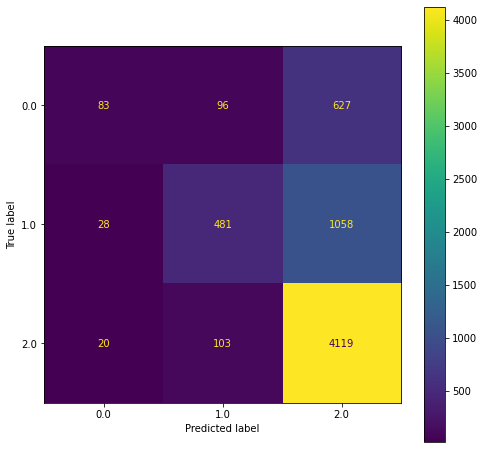

In [147]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(cat_clf, X_val, y_val)
plt.show()

<AxesSubplot:>

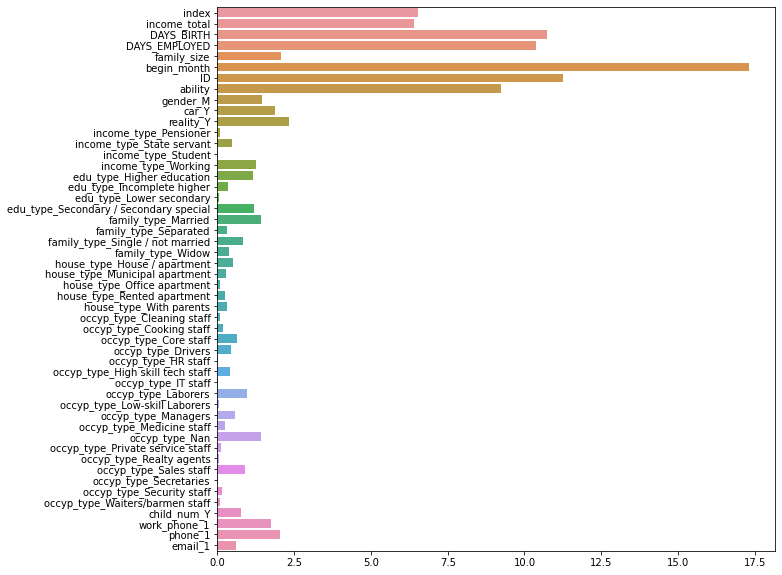

In [122]:
#특성 중요도 시각화
import seaborn as sns
plt.figure(figsize=(10,10))
feature_names = list(train_x.columns)
sns.barplot(cat_clf.feature_importances_, y=feature_names)

In [148]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(cat_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        cat_clf.fit(X_train, y_train)
        
        predictions=cat_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=cat_clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cat_clf)

Learning rate set to 0.092455
0:	learn: 1.0467379	total: 7.39ms	remaining: 7.39s
1:	learn: 1.0059375	total: 14.6ms	remaining: 7.3s
2:	learn: 0.9731448	total: 20.4ms	remaining: 6.79s
3:	learn: 0.9458014	total: 25.6ms	remaining: 6.38s
4:	learn: 0.9232234	total: 32.2ms	remaining: 6.41s
5:	learn: 0.9045638	total: 38ms	remaining: 6.29s
6:	learn: 0.8893929	total: 44.2ms	remaining: 6.28s
7:	learn: 0.8768202	total: 50.3ms	remaining: 6.23s
8:	learn: 0.8654568	total: 56.4ms	remaining: 6.21s
9:	learn: 0.8564987	total: 63ms	remaining: 6.24s
10:	learn: 0.8492563	total: 69ms	remaining: 6.21s
11:	learn: 0.8423978	total: 75.3ms	remaining: 6.2s
12:	learn: 0.8364673	total: 81.6ms	remaining: 6.2s
13:	learn: 0.8314475	total: 88ms	remaining: 6.2s
14:	learn: 0.8275060	total: 94.2ms	remaining: 6.19s
15:	learn: 0.8237737	total: 99.9ms	remaining: 6.14s
16:	learn: 0.8205436	total: 108ms	remaining: 6.25s
17:	learn: 0.8181915	total: 114ms	remaining: 6.24s
18:	learn: 0.8156608	total: 121ms	remaining: 6.24s
19:	lea

In [149]:
my_submission
submission.loc[:,1:]=my_submission
submission.to_csv('newborn_cat1_submission.csv', index=False)